In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

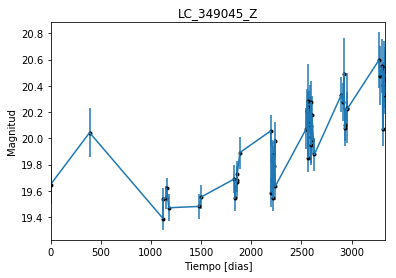

In [2]:
data = np.genfromtxt('LC_349045_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_349045_Z')
plt.savefig("LC_349045_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

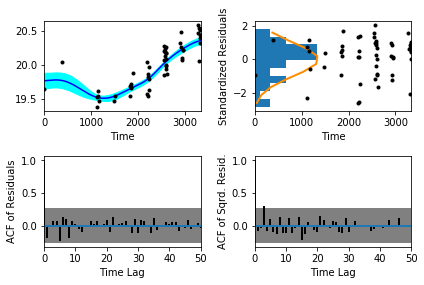

In [5]:
sample.assess_fit()

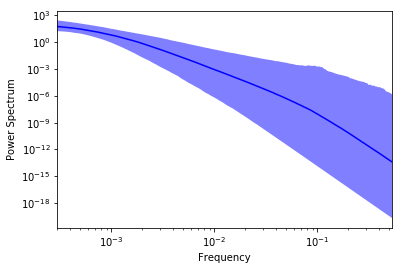

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

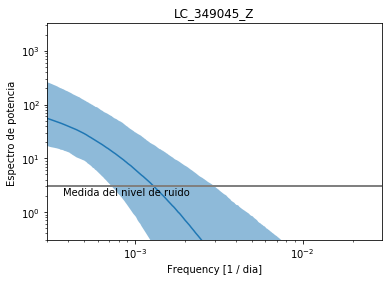

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_349045_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_349045_Z')

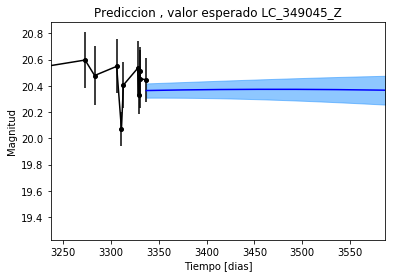

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_349045_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_349045_Z')

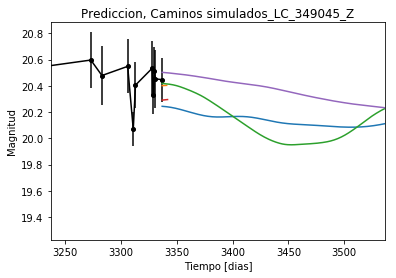

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_349045_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


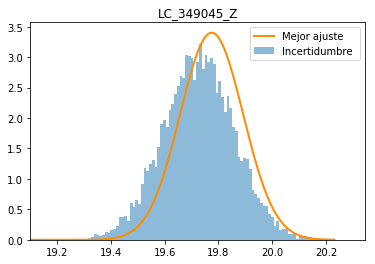

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_349045_Z')
plt.savefig("Mejor_ajuste_LC_349045_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_349045_Z')

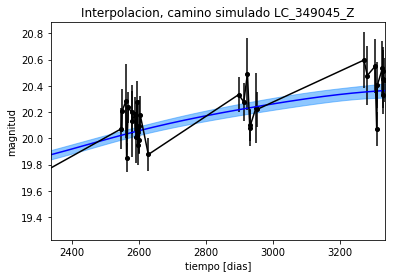

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_349045_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_349045_Z')

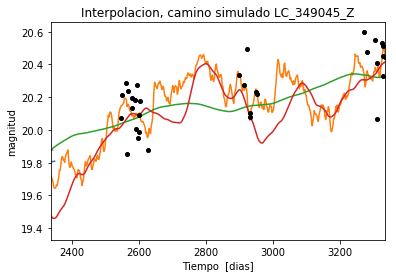

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_349045_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 430.451386072
Median: 0.00854880923309
Standard deviation: 0.198170450963
68% credibility interval: [ 0.00071747  0.16713081]
95% credibility interval: [  3.28645276e-04   7.99770904e-01]
99% credibility interval: [  3.03116927e-04   1.01351875e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 424.062750565
Median: 0.000768209468185
Standard deviation: 0.0561865685873
68% credibility interval: [ 0.00036187  0.0083382 ]
95% credibility interval: [ 0.00030788  0.13520907]
99% credibility interval: [  3.01064817e-04   4.22931808e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 273.236252586
Median: 0.0164296161428
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 687.661572708
Median: 36.8626229408
Standard deviation: 1.72920719066
68% credibility interval: [ 34.96675899  38.2233326 ]
95% credibility interval: [ 32.45266904  39.10739707]
99% credibility interval: [ 30.37318873  39.38956852]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 459.734865682
Median: 0.598097730849
Standard deviation: 2.1887187206
68% credibility interval: [ 0.04539811  3.72875462]
95% credibility interval: [ 0.01202077  7.44255782]
99% credibility interval: [  8.97670283e-03   1.00598999e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 540.207993527
Median: 0.151232126266
Standard deviation: 8.17834014927
68% credibility interval: [  5.62163751e-03   5.93703550e+00]
95% credibility interva

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310432
Median: 2.88658433113e-21
Standard deviation: 2.89466244687e+31
68% credibility interval: [  2.71578586e-41   2.83876073e-06]
95% credibility interval: [  2.26639740e-95   5.08114881e-01]
99% credibility interval: [  1.74973321e-103   5.56829234e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1980.49882363
Median: 19.8861701671
Standard deviation: 0.188277747569
68% credibility interval: [ 19.72417109  20.04507545]
95% credibility interval: [ 19.51757478  20.27746514]
99% credibility interval: [ 19.32313771  20.47743751]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 270.71012042
Median: 0.000113972330083
Standard deviation: 0.229826168269
68% credibility interval: [ 0.          0.22668476]
95% credibility interval: [ 0.          0.86081613]
99% credibility interval: [ 0.          1.02544984]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 270.71012042
Median: 0.000113972330083
Standard deviation: 0.229826168269
68% credibility interval: [ 0.          0.22668476]
95% credibility interval: [ 0.          0.86081613]
99% credibility interval: [ 0.          1.02544984]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1093.697814
Median: 0.0
Standard deviation: 0.000207501775245
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 687.661572708
Median: 36.8626229408
Standard deviation: 1.72920719066
68% credibility interval: [ 34.96675899  38.2233326 ]
95% credibility interval: [ 32.45266904  39.10739707]
99% credibility interval: [ 30.37318873  39.38956852]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1062.89344857
Median: 0.0921463100927
Standard deviation: 0.11866240439
68% credibility interval: [ 0.05214702  0.1782892 ]
95% credibility interval: [ 0.03292485  0.39502916]
99% credibility interval: [ 0.02576683  0.69071061]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1236.21627359
Median: 1.11357478542
Standard deviation: 0.173791129565
68% credibility interval: [ 0.96437534  1.30449728]
95% credibility interval: [ 0.83533998  1.51965721]
99% credibility interval: [ 0.76478912  1.66466325]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1265.78600803
Median: 2.66519892773e-05
Standard deviation: 0.178662788519
68% credibility interval: [  4.80555994e-07   2.43970179e-03]
95% credibility interval: [  1.63521058e-08   1.29981766e-01]
99% credibility interval: [  2.76992312e-09   8.31514394e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 430.451386072
Median: (-0.0537137525673-0.902099957022j)
Standard deviation: 1.90673292712
68% credibility interval: [-1.05011387-1.30266866j -0.00450800-2.08345115j]
95% credibility interval: [ -5.02510879e+00 -5.03433036e+00j  -2.06493917e-03 -6.40218930e-04j]
99% credibility interval: [ -6.36812612e+00+0.j          -1.90453982e-03-0.00140917j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 424.062750565
Median: (-0.00482680244334+0.018882628615j)
Standard deviation: 1.48656762633
68% credibility interval: [-0.05239046+0.53612591j -0.00227367+0.j        ]
95% credibility interval: [-0.84954367+3.86139222j -0.00193448+0.j        ]
99% credibility interval: [ -2.65735892e+00+4.00059778j  -1.89164603e-03+0.j        ]
P